In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.decomposition import PCA

In [4]:
data_file = '/media/amlan/Data/Thesis Data/Processed Data/new_train_data.csv'
df = pd.read_csv(data_file, index_col=0)
df = df.reset_index(drop=True)

df = df[df.Behavior != 'No observation']
df = df[df.VeDBA > 1e-5]
df.VeDBA  = np.log(df.VeDBA)
df = df.rename(columns={'VeDBA': 'Log VeDBA'})

#df = df.drop(['StdNorm'], axis=1)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.reset_index(drop=True)
df.Behavior.value_counts()

Scrabbling                        2765
Foraging                          1564
RunningGPS                         750
Bipedal vigilance                  728
Self groom                         241
Reforage                           184
Haunch quadrupedal vigilance       138
Social                             114
Standing quadrupedal vigilance     105
Running                            103
Sitting vigilance                   88
Processing                          61
Walking                             59
Marking                              4
Others                               2
Name: Behavior, dtype: int64

In [5]:
for i in df.Behavior.unique():
    print(str(i) + ' Log VeDBA Mean: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].mean())
    print(str(i) + ' Log VeDBA Var: ',df.loc[df['Behavior'] == str(i),'StdNorm'].mean())
    print('---')

Haunch quadrupedal vigilance Log VeDBA Mean:  -2.855002430723025
Haunch quadrupedal vigilance Log VeDBA Var:  0.061116046614161756
---
Sitting vigilance Log VeDBA Mean:  -3.073597961271805
Sitting vigilance Log VeDBA Var:  0.036188922537667007
---
Scrabbling Log VeDBA Mean:  -0.9178368103980573
Scrabbling Log VeDBA Var:  0.30493229669715527
---
Foraging Log VeDBA Mean:  -0.7184753685215342
Foraging Log VeDBA Var:  0.38042576132199996
---
Bipedal vigilance Log VeDBA Mean:  -2.721483249300213
Bipedal vigilance Log VeDBA Var:  0.07987007662618759
---
Processing Log VeDBA Mean:  -1.2820964519190503
Processing Log VeDBA Var:  0.2493689463299557
---
Reforage Log VeDBA Mean:  -0.7712826455807013
Reforage Log VeDBA Var:  0.3659827408504655
---
Running Log VeDBA Mean:  -0.8054474638277933
Running Log VeDBA Var:  0.6816796850162863
---
Walking Log VeDBA Mean:  -1.0559441471699482
Walking Log VeDBA Var:  0.33469676056336245
---
Standing quadrupedal vigilance Log VeDBA Mean:  -2.400619228675674
St

In [6]:
df.loc[df['Behavior'] == 'Sitting vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Bipedal vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Haunch quadrupedal vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Standing quadrupedal vigilance','Behavior'] = 'Vigilance'

df.loc[df['Behavior'] == 'Walking','Behavior'] = 'Moving'


df.loc[df['Behavior'] == 'Scrabbling','Behavior'] = 'Foraging' #Change

df.loc[df['Behavior'] == 'Reforage','Behavior'] = 'Foraging'

df.loc[df['Behavior'] == 'Social','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Processing','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Self groom','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Marking','Behavior'] = 'Others'

for i in df.Behavior.unique():
    print(str(i) + ' Log VeDBA Mean: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].mean())
    print(  str(i) + ' Log VeDBA Var: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].var())
    print('\n')

Vigilance Log VeDBA Mean:  -2.7363284046583543
Vigilance Log VeDBA Var:  1.183266691204018


Foraging Log VeDBA Mean:  -0.8427720504997023
Foraging Log VeDBA Var:  0.1545636707197599


Others Log VeDBA Mean:  -1.4438590138223286
Others Log VeDBA Var:  0.42137959117407653


Running Log VeDBA Mean:  -0.8054474638277933
Running Log VeDBA Var:  1.845572968722563


Moving Log VeDBA Mean:  -1.0559441471699482
Moving Log VeDBA Var:  0.6730057487137089


RunningGPS Log VeDBA Mean:  -2.0123439712708167
RunningGPS Log VeDBA Var:  1.144993972810475




Text(0.5, 1.0, 'VeDBA Distribution Across Behavior')

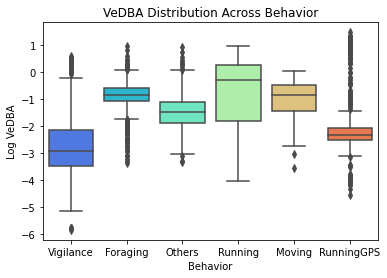

In [7]:
import seaborn as sns

fig,ax = plt.subplots()
sns.boxplot(x='Behavior',y='Log VeDBA',data=df[['Behavior','Log VeDBA']], palette='rainbow',showfliers=True)
plt.title("VeDBA Distribution Across Behavior")

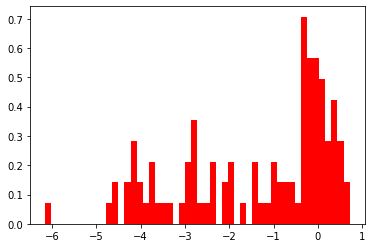

In [ ]:
#plt.hist(np.log(df.loc[df['Behavior'] != 'Running','StdNorm']),bins=50,color='b',density='True')
plt.hist(np.log(df.loc[df['Behavior'] == 'Running','StdNorm']),bins=50,color='r',density='True') 
plt.show()

In [ ]:
df.Behavior.value_counts()

Foraging     4667
Vigilance    1067
Others        422
Running       103
Moving         56
Name: Behavior, dtype: int64

In [40]:
df_delay1 = pd.DataFrame()
df_delay1['Timestamp'] = df['Timestamp'] + pd.Timedelta('2s')
df_delay1['Delay_X_Mean1'] =  df['X_Mean']
df_delay1['Delay_X_Max1'] =  df['X_Max']
df_delay1['Delay_LogVeDBA1'] =  df['Log VeDBA']
df_delay1.head()

,Timestamp,Delay_X_Mean1,Delay_X_Max1,Delay_LogVeDBA1
0,2021-08-14 10:12:01,-0.678976,-0.5158,-2.423731
1,2021-08-14 10:12:02,-0.756978,-0.6327,-1.334830
2,2021-08-14 10:12:03,-0.713138,-0.6202,-2.557237
3,2021-08-14 10:12:04,-0.754204,-0.6058,-1.788817
4,2021-08-14 10:12:05,-0.782126,-0.7034,-3.063260


In [41]:
df_delay = pd.DataFrame()
df_delay['Timestamp'] = df['Timestamp'] + pd.Timedelta('1s')
df_delay['Delay_X_Mean'] =  df['X_Mean']
df_delay['Delay_X_Max'] =  df['X_Max']
df_delay['Delay_LogVeDBA'] =  df['Log VeDBA']
print(df_delay.head())


            Timestamp  Delay_X_Mean  Delay_X_Max  Delay_LogVeDBA
0 2021-08-14 10:12:00     -0.678976      -0.5158       -2.423731
1 2021-08-14 10:12:01     -0.756978      -0.6327       -1.334830
2 2021-08-14 10:12:02     -0.713138      -0.6202       -2.557237
3 2021-08-14 10:12:03     -0.754204      -0.6058       -1.788817
4 2021-08-14 10:12:04     -0.782126      -0.7034       -3.063260


In [42]:
A = df.merge(df_delay,on = 'Timestamp',how='inner')
X = A.merge(df_delay1,on = 'Timestamp',how='inner')
X = A
X.head()

,Timestamp,Behavior,Group,Individual,X_Mean,Y_Mean,Z_Mean,X_Var,Y_Var,Z_Var,...,Y_Max,Z_Max,X_Min,Y_Min,Z_Min,Log VeDBA,StdNorm,Delay_X_Mean,Delay_X_Max,Delay_LogVeDBA
0,2021-08-14 10:12:00,Vigilance,NQ,VNQF014,-0.756978,-0.416722,0.330798,0.006906,0.028081,0.046313,...,-0.0056,0.6640,-0.9722,-0.7449,-0.0594,-1.334830,0.052639,-0.678976,-0.5158,-2.423731
1,2021-08-14 10:12:01,Vigilance,NQ,VNQF014,-0.713138,-0.570652,0.316574,0.001709,0.003561,0.004448,...,-0.3439,0.4670,-0.8115,-0.6965,0.0678,-2.557237,0.043237,-0.756978,-0.6327,-1.334830
2,2021-08-14 10:12:02,Vigilance,NQ,VNQF014,-0.754204,-0.557768,0.227460,0.004396,0.018012,0.015511,...,-0.2635,0.5483,-0.8940,-1.1410,-0.0469,-1.788817,0.075593,-0.713138,-0.6202,-2.557237
3,2021-08-14 10:12:03,Vigilance,NQ,VNQF014,-0.782126,-0.516732,0.212264,0.000703,0.001587,0.001007,...,-0.4064,0.3126,-0.8440,-0.6408,0.1407,-3.063260,0.026440,-0.754204,-0.6058,-1.788817
4,2021-08-14 10:12:04,Vigilance,NQ,VNQF014,-0.782132,-0.521298,0.217310,0.000207,0.000174,0.000288,...,-0.4883,0.2648,-0.8128,-0.5471,0.1876,-3.756245,0.011831,-0.782126,-0.7034,-3.063260


Running Mean

Accuracy: 0.9136975455265242


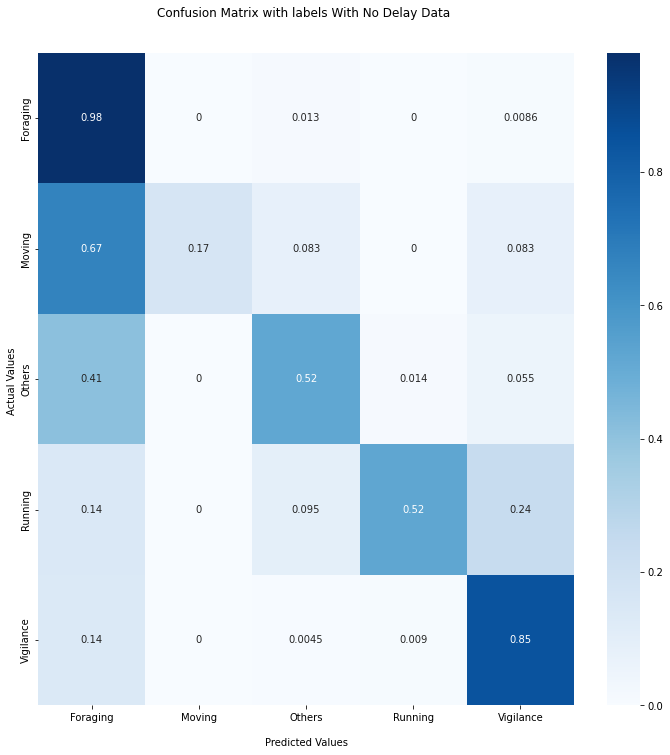

In [26]:
Rolling_df = df.iloc[:,4:].rolling(window=2).mean() #using n-1, n-2
Rolling_df['Timestamp'] = df['Timestamp']
behav = df[['Timestamp','Behavior','Group','Individual']]
X_Rolling = behav.merge(Rolling_df,on='Timestamp',how='inner').dropna()


x=X_Rolling.iloc[:,4:]  # Features
#x=df.iloc[:,4:]  # Features

y=X_Rolling['Behavior']  # Labels

Scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=150, n_jobs=-1,class_weight='balanced', random_state=42)


X_train = Scaler.fit_transform(X_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

RF

Accuracy: 0.934763948497854


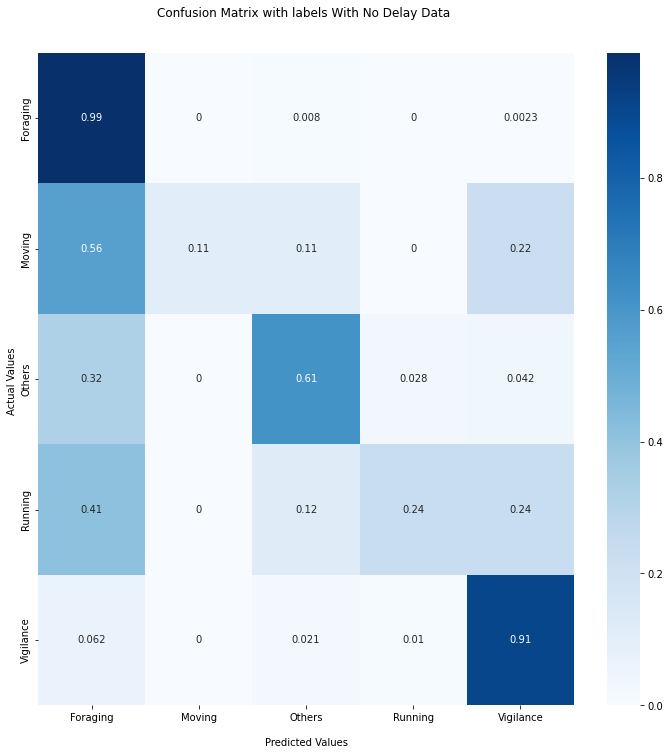

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.decomposition import PCA

df_copy = X.copy()
#df_copy = df_copy[df_copy['Behavior']!='Others']

x=df_copy.iloc[:,4:]  # Features
#x=X.iloc[:,4:]  # Features




y=df_copy['Behavior']  # Labels


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)


X_train = Scaler.fit_transform(X_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

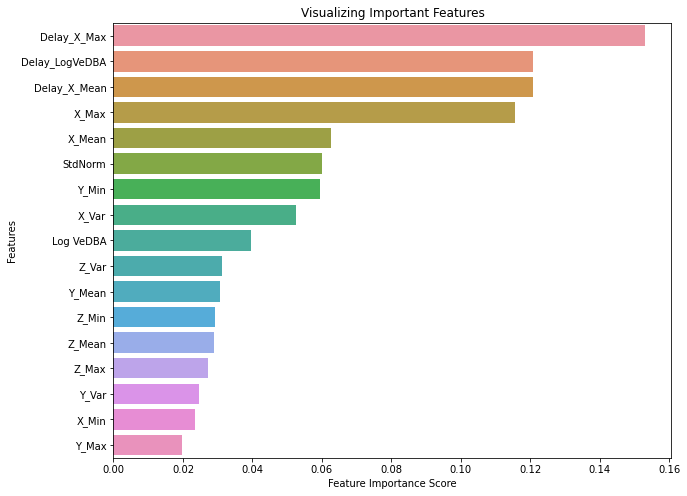

In [65]:
plt.figure(figsize=(10,8))
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

SMOTE RF

Accuracy: 0.9431721798134012


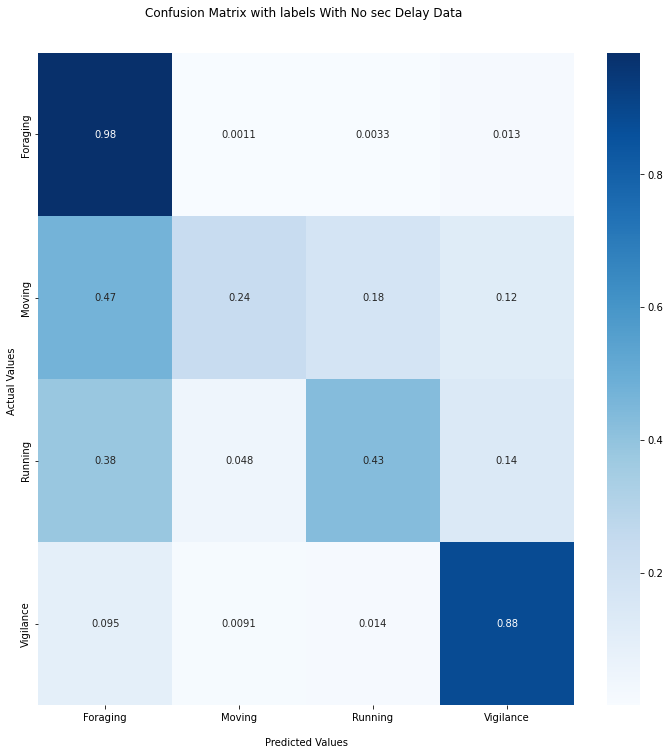

In [66]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

df_copy = df.copy()
df_copy = df_copy[df_copy['Behavior']!='Others']
x=df_copy.iloc[:,4:]  # Features
y=df_copy['Behavior']  # Labels


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)


X_train = Scaler.fit_transform(X_train)


X_train, y_train = oversample.fit_resample(X_train, y_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No sec Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

XGB

Accuracy: 0.9286376274328082


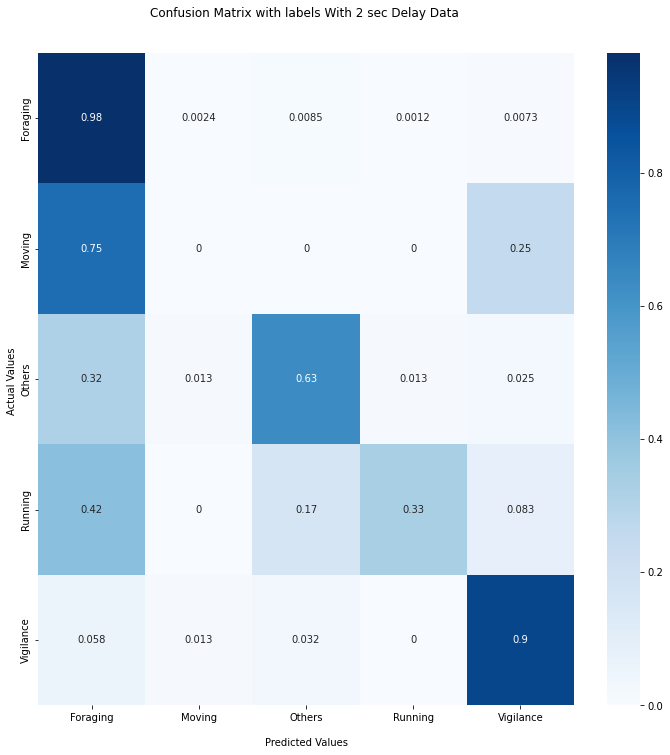

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

x=X.iloc[:,4:]  # Features
#x=df.iloc[:,4:]  # Features




y=X['Behavior']  # Labels

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42) 

clf = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With 2 sec Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

SVM

Accuracy: 0.8915281076801267


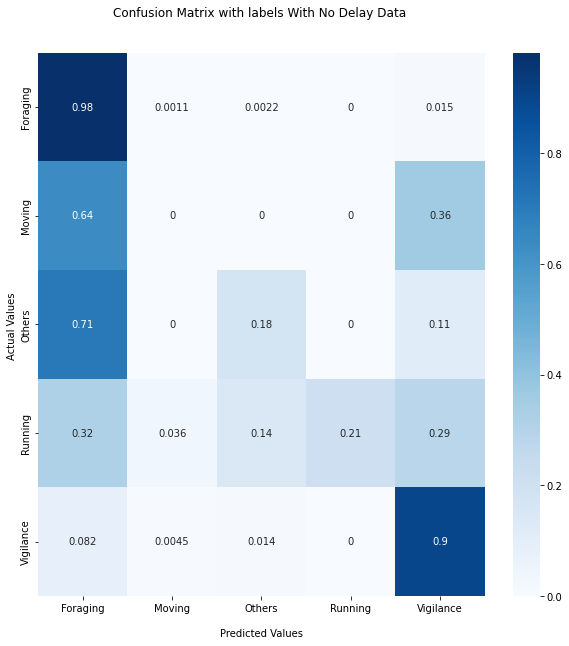

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.decomposition import PCA

x=df.iloc[:,4:]  # Features
#X.iloc[:,-1] = np.log(X.iloc[:,-1]+1)

Scaler = StandardScaler()

y=df['Behavior']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test


X_train = Scaler.fit_transform(X_train)

svclassifier = SVC(kernel='linear', gamma='scale')
svclassifier.fit(X_train, y_train)

X_test = Scaler.transform(X_test)

y_pred=svclassifier.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(10,10))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

KNN

Accuracy: 0.933271547729379


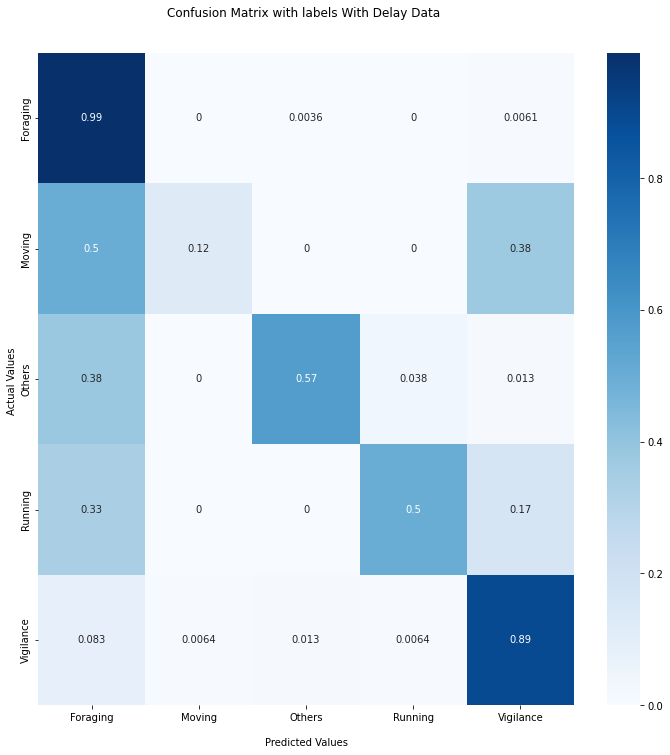

In [71]:
from sklearn.neighbors import KNeighborsClassifier

x=X.iloc[:,4:]  # Features

Scaler = StandardScaler()

y=X['Behavior']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test


X_train = Scaler.fit_transform(X_train)


knn = KNeighborsClassifier(n_neighbors=10)


X_test = Scaler.transform(X_test)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

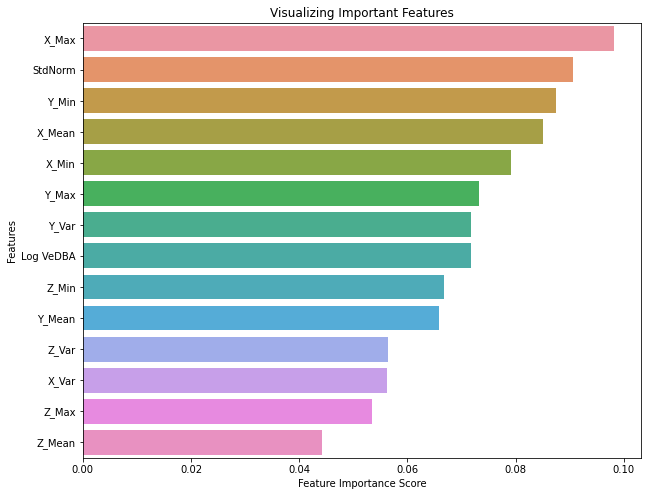

In [59]:
plt.figure(figsize=(10,8))
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()